# Initialization part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Loading all data files with raw metrics

In [2]:
download_durations=pd.read_csv("incoming_data_download_duration.csv")

In [3]:
download_durations.head()

,Duration
0,0.499148
1,0.128235
2,0.144293
3,0.131095
4,0.143774


In [4]:
analysis_durations=pd.read_csv("analysis_duration.csv")

In [5]:
analysis_durations.head()

,Duration
0,1.094086
1,1.068060
2,1.055788
3,1.061945
4,1.295053


In [6]:
sending_results_duration=pd.read_csv("sending_results_duration.csv")

In [7]:
sending_results_duration.head()

,Duration
0,0.011912
1,0.008638
2,0.011641
3,0.008381
4,0.012427


In [8]:
upload_timestamps=pd.read_csv("upload_timestamps.csv", parse_dates=[0])

In [9]:
upload_timestamps.head()

,Timestamp
0,2020-01-15 03:59:47
1,2020-01-15 08:19:25
2,2020-01-15 11:42:07
3,2020-01-15 14:58:48
4,2020-01-15 18:21:56


## Incoming data statistic

### Uploads per day

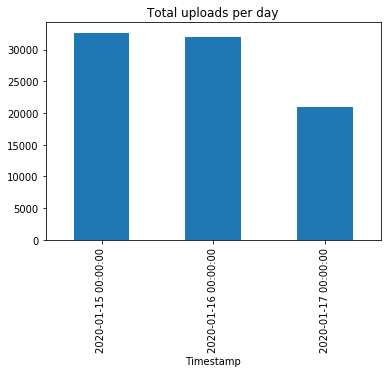

In [10]:
by_day = upload_timestamps.resample('1D', on='Timestamp').count()
by_day_plot = by_day.plot(title="Total uploads per day",legend=None, kind="bar")

### Uploads per hour

In [11]:
by_hour = upload_timestamps.resample('60min', on='Timestamp').count()
by_hour[:-1].describe()

,Timestamp
count,61.000000
mean,1394.295082
std,133.440417
min,1148.000000
25%,1304.000000
50%,1373.000000
75%,1439.000000
max,1789.000000


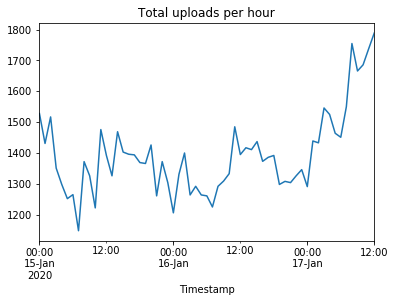

In [12]:
by_hour_plot = by_hour[:-1].plot(title="Total uploads per hour",legend=None)

### Uploads per minute

In [13]:
by_minute = upload_timestamps.resample('1min', on='Timestamp').count()
by_minute.describe()

,Timestamp
count,3683.000000
mean,23.266630
std,8.662013
min,0.000000
25%,19.000000
50%,23.000000
75%,27.000000
max,208.000000


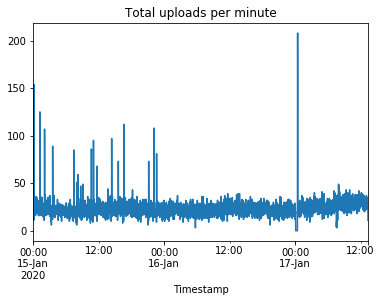

In [14]:
by_minute_plot = by_minute.plot(title="Total uploads per minute",legend=None)

# Processing durations

## 1. Download

In [15]:
download_durations.describe()

,Duration
count,1043.000000
mean,0.163541
std,0.055815
min,0.119289
25%,0.143617
50%,0.152909
75%,0.166216
max,1.105731


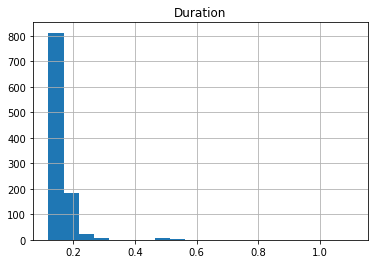

In [16]:
download_durations_histogram=download_durations.hist(bins=20)

## 2. Analysis

In [17]:
analysis_durations.describe()

,Duration
count,1043.000000
mean,1.223845
std,0.416524
min,0.704329
25%,1.028769
50%,1.087946
75%,1.202589
max,4.486283


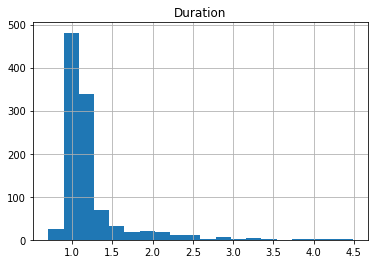

In [18]:
analysis_durations_histogram=analysis_durations.hist(bins=20)

## 3. Sending results

In [19]:
sending_results_duration.describe()

,Duration
count,1526.000000
mean,0.011016
std,0.001674
min,0.007882
25%,0.009374
50%,0.011242
75%,0.011765
max,0.019010


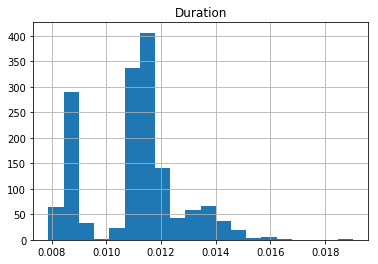

In [20]:
sending_results_durations_histogram=sending_results_duration.hist(bins=20)

## 4. Total duration of the whole flow

In [21]:
total_durations = download_durations + analysis_durations + sending_results_duration

In [22]:
total_durations.describe()

,Duration
count,1043.000000
mean,1.398158
std,0.422949
min,0.862157
25%,1.198555
50%,1.261378
75%,1.380220
max,4.771932


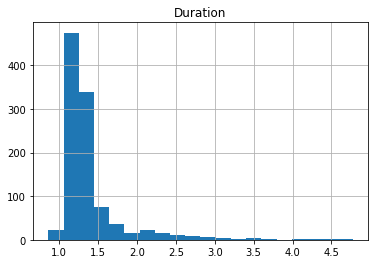

In [23]:
total_durations_histogram=total_durations.hist(bins=20)